## Objective

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [1]:
#Importations
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Columns
Pregnancies - Number of times pregnant
2

Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test


BloodPressure - Diastolic blood pressure (mm Hg)


SkinThickness - Triceps skin fold thickness (mm)


Insulin - 2-Hour serum insulin (mu U/ml)


BMI - Body mass index (weight in kg/(height in m)^2)


DiabetesPedigreeFunction


Age - Age (years)


Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 1.	Import the data from the dataset

In [2]:
#importing datasets
train = pd.read_csv('https://storage.googleapis.com/kaggle-datasets/228/482/diabetes.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564514990&Signature=RvujPabxON0lZ%2FuoW%2BkXyHWuw0W2tL%2BCl%2F8EPq52orum3xgH5f0x454PjSl4JH11mqwAht55j8BRL8pFemY19YW60v5Z4SANXsw%2Bu%2BYFL0%2FMS1frPdjfD7tzu6N9T9okIrc%2BGHSqKUHM%2BBP23nnpPZzzeYx33jxpXTxr9LQYITkF80ACOusevdJouCrsfso1iHiSaj402arQL5GEBkpo04PbpQcfSQ%2FhCtinFnPaWVzYIep2UNOSdEeG4tcwUnuPcAUnKewedneh%2BjTZ9tPB2%2F%2FqzEpn%2F6uQQ62xDeWa5V7oIfMcJz%2F813J0Y8TvQwxUaN8YN89%2BOaig4uEcdwxuOQ%3D%3D')
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2.	Print only the patient ID of the first 7 diabetic patients

In [3]:
train.iloc[:7, :0]

""
0
1
2
3
4
5
6


## 3.	Delete the column that will not be of any use when building a machine learning model

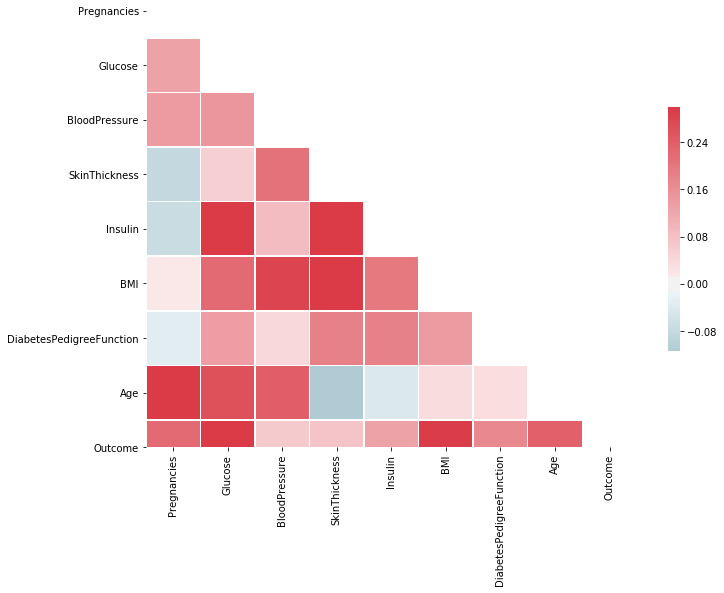

In [4]:
corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
train = train.drop('SkinThickness', axis=1)
train.head(4)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0


## 4.	Create a histogram using pandas with the Diastolic Blood Pressure

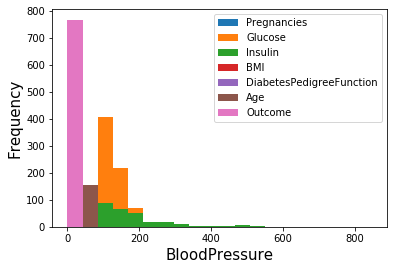

In [6]:
train.plot(kind='hist', bins=20, x='BloodPressure' )
plt.xlabel('BloodPressure',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

## 5.	Create a pie chart using pandas representing the Diabetic and Non-Diabetic proportion

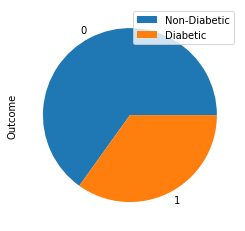

In [7]:
train.Outcome.value_counts().plot(kind='pie')
labels = ['Non-Diabetic', 'Diabetic']
plt.legend(loc='best', labels=labels)


## 6.	How many people are non-Diabetic?

In [21]:
#train.Outcome.value_counts() == 1
train[train["Outcome"] == 1].count()

Pregnancies                 268
Glucose                     268
BloodPressure               268
Insulin                     268
BMI                         268
DiabetesPedigreeFunction    268
Age                         268
Outcome                     268
dtype: int64

## 7.	Select all the rows where the number of pregnancies is greater than 5 

In [20]:
train[train['Pregnancies'] > 5].count()

Pregnancies                 219
Glucose                     219
BloodPressure               219
Insulin                     219
BMI                         219
DiabetesPedigreeFunction    219
Age                         219
Outcome                     219
dtype: int64

## 8.	Select the third cell in the row named BMI

In [10]:
train.iloc[2, 4]

23.3

## 9.	Print the names of all the columns

In [11]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 10.	Print the data type of each of the column

In [12]:
train.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## 11.	Summarize all the columns

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [14]:
train.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 12.	Using the following custom style:
•	Color cycle: 1f77b4, ff7f0e


•	Line width: 2.5


•	Label size 12


Visualize using matplotlib the relationship between the age and an individual being diabetic or not


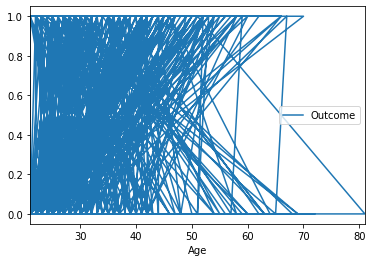

In [15]:
train.plot(kind='line', x='Age', y='Outcome')

## 13.	Create your own questions on the following topics and answer them:
    
    

•	Pandas


•	NumPy


•	Matplotlib


•	Seaborn


•	Plotty & Cufflinks 



Your questions should be based on the dataset provided.
